# TESLA STOCKS ANALYSIS AND PREDICTION

Introduction:
This project involves the analysis of Tesla stocks from January 2021 to December 2023. The data was gathered using the YFinance API, which provides various daily updated stock datasets. I utilized the Python YFinance library to fetch the dataset, although the data can also be accessed from their website: Yahoo Finance.

Data Collection:
The YFinance API was used to collect Tesla stock data over the specified period. This API is known for offering a wide range of financial datasets that are updated daily.

Prediction Methodology:
For the prediction of stock values for January, two approaches were employed:

LSTM Regression Model: A Long Short-Term Memory (LSTM) regression model was used to predict the stock prices.
Combined LSTM and Simple RNN Model: This approach involved combining an LSTM model with a Simple Recurrent Neural Network (RNN) model to forecast future stock prices.

In [1]:
!pip install yfinance
!pip install --user statsmodels

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")

# Get historical data (adjust the start and end dates as needed)
df = tesla.history(start="2021-01-01", end="2024-01-01")

In [3]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04 00:00:00-05:00,239.820007,248.163330,239.063339,243.256668,145914600,0.0,0.0
2021-01-05 00:00:00-05:00,241.220001,246.946671,239.733337,245.036667,96735600,0.0,0.0
2021-01-06 00:00:00-05:00,252.830002,258.000000,249.699997,251.993332,134100000,0.0,0.0
2021-01-07 00:00:00-05:00,259.209991,272.329987,258.399994,272.013336,154496700,0.0,0.0
2021-01-08 00:00:00-05:00,285.333344,294.829987,279.463318,293.339996,225166500,0.0,0.0


In [4]:
print(df.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [5]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


# Time Series Plot

In this plot, the closing prices of Tesla stocks are observed over a period of time. It appears that Tesla stocks have experienced significant fluctuations throughout the period. However, by the end of December, the stock prices have decreased.

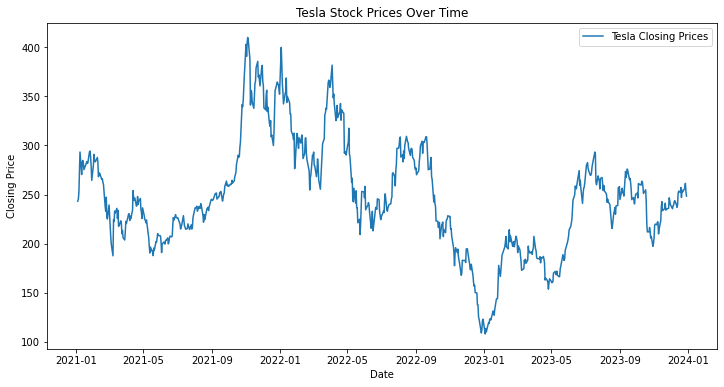

In [6]:
# Convert the index to timezone-naive datetime objects
df.index = df.index.tz_localize(None)

# Convert the DataFrame index and 'Close' column to numpy arrays
dates = df.index.to_numpy()
closing_prices = df['Close'].to_numpy()

plt.figure(figsize=(12, 6))
plt.plot(dates, closing_prices, label='Tesla Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla Stock Prices Over Time')
plt.legend()
plt.show()

# Trend Analysis using Simple Moving Average

Examining the moving averages of Tesla stocks reveals high short-term variations (30 days). However, from a broader perspective (100 or 200 days), the stocks appeared relatively stable. Notably, stock prices experienced a significant decline in 2023. Even considering long-term investments, by the end of 2023, the stock prices had not fully recovered to their peak levels from early 2023. Additionally, there was a slight decline from November to December 2023. Overall, this analysis suggests that investing in Tesla stocks is currently riskier, and it may not be an ideal time to invest due to the potential for further decline in stock prices.

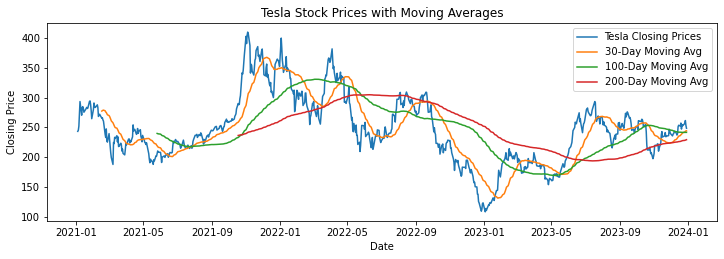

In [7]:
# Convert the index to timezone-naive datetime objects
df.index = df.index.tz_localize(None)

# Calculate rolling means
rolling_30 = df['Close'].rolling(window=30).mean().to_numpy()
rolling_100 = df['Close'].rolling(window=100).mean().to_numpy()
rolling_200 = df['Close'].rolling(window=200).mean().to_numpy()

# Convert DataFrame index and 'Close' column to numpy arrays for plotting
dates = df.index.to_numpy()
closing_prices = df['Close'].to_numpy()

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(dates, closing_prices, label='Tesla Closing Prices')
plt.plot(dates, rolling_30, label='30-Day Moving Avg')
plt.plot(dates, rolling_100, label='100-Day Moving Avg')
plt.plot(dates, rolling_200, label='200-Day Moving Avg')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla Stock Prices with Moving Averages')
plt.legend()
plt.show()

# Volatility Analysis with Bollinger Bands:

Volatility analysis using Bollinger Bands shows that higher deviations in volatility suggest greater chances of future fluctuations in stock prices. Throughout both short and long-term periods, there has consistently been significant price variation. Recently, this trend has intensified, with stock prices experiencing dramatic declines.

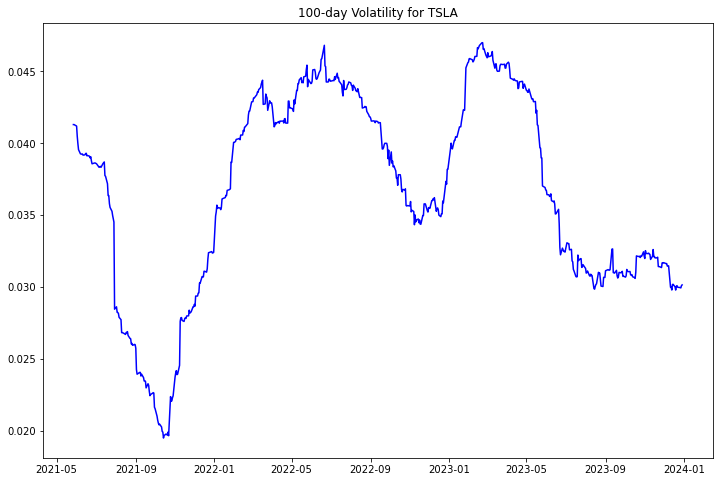

In [8]:
# Calculate daily returns
df['Daily_Returns'] = df['Close'].pct_change()

# Calculate 100-day volatility (standard deviation of returns)
volatility = df['Daily_Returns'].rolling(window=100).std()

# Plotting the volatility
plt.figure(figsize=(12, 8))
plt.plot(volatility, color='blue')
plt.title(f'100-day Volatility for TSLA')
plt.show()

# Seasonality Analysis

The seasonal trend analysis on a monthly basis indicates a gradual decrease in stock prices.

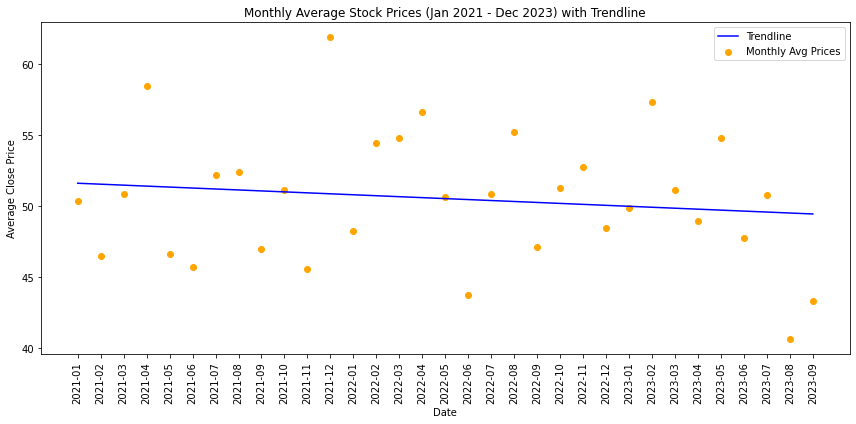

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.DataFrame({
    'Close': np.random.rand(1000) * 100
}, index=pd.date_range(start='2021-01-01', periods=1000, freq='D'))

# Resample the data to get monthly averages
monthly_avg = data['Close'].resample('M').mean()

# Extracting month and year for scatter plot
monthly_avg.index = monthly_avg.index.strftime('%Y-%m')

# Creating x and y values for the trendline
x_values = np.arange(len(monthly_avg))
y_values = monthly_avg.values

# Calculate linear regression (trendline)
coefficients = np.polyfit(x_values, y_values, 1)
trendline = coefficients[0] * x_values + coefficients[1]

# Convert index to numpy array for plotting
index_array = np.array(monthly_avg.index)

# Plotting the scatter plot of monthly average stock prices with trendline
plt.figure(figsize=(12, 6))
plt.scatter(index_array, monthly_avg.values, color='orange', label='Monthly Avg Prices')
plt.plot(index_array, trendline, color='blue', label='Trendline')
plt.title('Monthly Average Stock Prices (Jan 2021 - Dec 2023) with Trendline')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

# Predict prices for the month of January 2024 

To predict Tesla stock prices for January 2024, the LSTM (Long Short-Term Memory) model was used. The LSTM model is well-suited for this task due to its ability to capture long-term dependencies in sequential data.

LSTMs have a memory cell that retains information over extended periods, making them effective at recognizing patterns or trends in historical stock prices. Given that stock market data is often unstable with significant fluctuations, LSTMs are particularly adept at handling such variability. They can process various input types, such as volume and opening prices, and are capable of predicting either the next-day price or multiple future steps.

In [10]:
pip install tensorflow pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime, timedelta


# Extract the 'Close' prices
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the dataset
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_steps = 60  # Number of time steps to consider for prediction
X, y = create_dataset(scaled_data, time_step=time_steps)

# Reshape data for LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32)

# Predicting the next month stock prices
last_month = scaled_data[-time_steps:]
last_month = last_month.reshape(1, time_steps, 1)

predicted_prices = []
for i in range(30):  # Predicting 30 days (1 month) ahead
    prediction = model.predict(last_month)
    predicted_prices.append(prediction[0, 0])
    last_month = np.append(last_month[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Inverse transform the predicted prices to original scale
predicted_prices = np.array(predicted_prices).reshape(-1, 1)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Generate dates for the next month
last_date = df.index[-1]  # Assuming the index contains date information
predicted_dates = [last_date + pd.DateOffset(days=i) for i in range(1, 31)]

# Create a DataFrame for predicted prices and dates
predicted_df = pd.DataFrame({'Date': predicted_dates, 'Predicted Close': predicted_prices.flatten()})
print(predicted_df)


Epoch 1/100
22/22 [==============================] - 4s 30ms/step - loss: 0.0728
Epoch 2/100
22/22 [==============================] - 1s 30ms/step - loss: 0.0096
Epoch 3/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0073
Epoch 4/100
22/22 [==============================] - 1s 35ms/step - loss: 0.0062
Epoch 5/100
22/22 [==============================] - 1s 36ms/step - loss: 0.0057
Epoch 6/100
22/22 [==============================] - 1s 35ms/step - loss: 0.0053
Epoch 7/100
22/22 [==============================] - 1s 36ms/step - loss: 0.0049
Epoch 8/100
22/22 [==============================] - 1s 32ms/step - loss: 0.0046
Epoch 9/100
22/22 [==============================] - 1s 37ms/step - loss: 0.0043
Epoch 10/100
22/22 [==============================] - 1s 36ms/step - loss: 0.0041
Epoch 11/100
22/22 [==============================] - 1s 36ms/step - loss: 0.0041
Epoch 12/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0040
Epoch 13/100
22/22 [=====

1/1 [==============================] - 0s 22ms/step
         Date  Predicted Close
0  2023-12-30       253.424118
1  2023-12-31       255.465683
2  2024-01-01       258.492554
3  2024-01-02       261.344666
4  2024-01-03       264.112152
5  2024-01-04       266.993683
6  2024-01-05       270.088104
7  2024-01-06       273.407104
8  2024-01-07       276.918243
9  2024-01-08       280.574402
10 2024-01-09       284.329102
11 2024-01-10       288.141724
12 2024-01-11       291.978790
13 2024-01-12       295.812988
14 2024-01-13       299.622253
15 2024-01-14       303.388824
16 2024-01-15       307.098541
17 2024-01-16       310.740387
18 2024-01-17       314.305634
19 2024-01-18       317.787476
20 2024-01-19       321.180511
21 2024-01-20       324.479889
22 2024-01-21       327.681244
23 2024-01-22       330.780212
24 2024-01-23       333.772308
25 2024-01-24       336.652985
26 2024-01-25       339.417389
27 2024-01-26       342.060883
28 2024-01-27       344.579132
29 2024-01-28     

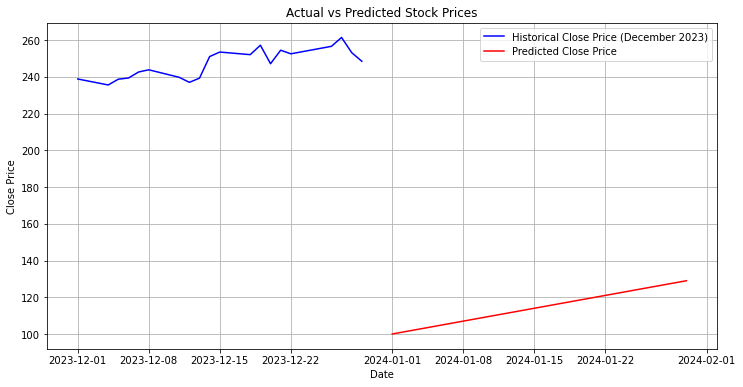

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('TSLA.csv', parse_dates=['Date'], index_col='Date')

# Filter historical data for December 2023
december_2023_data = df.loc[(df.index.month == 12) & (df.index.year == 2023)]

# Plotting the historical data for December 2023
plt.figure(figsize=(12, 6))
plt.plot(december_2023_data.index.to_numpy(), december_2023_data['Close'].to_numpy(), label='Historical Close Price (December 2023)', color='blue')

# Plotting the predicted prices for the next month
plt.plot(predicted_df['Date'].to_numpy(), predicted_df['Predicted Close'].to_numpy(), label='Predicted Close Price', color='red')

plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Finding Percent Difference in Predicted Prices for January 2024
To assess the accuracy of the predictions for Tesla stock prices in January 2024, calculated the percent difference between the predicted prices and the actual prices observed for that month.

The percent difference is a measure of how much the predicted values deviate from the actual values. This calculation is essential for evaluating the performance of the LSTM model in forecasting future stock prices.

In [20]:
if not predicted_df.empty:
    # Calculate percent change
    predicted_prices_jan_2023 = predicted_df['Predicted Close'].values
    percent_change_jan_2023 = ((predicted_prices_jan_2023[-1] - predicted_prices_jan_2023[0]) / predicted_prices_jan_2023[0]) * 100

    print(f"Predicted percent change for January 2023: {percent_change_jan_2023:.2f}%")
else:
    print("No data available for January 2023 in the predictions.")


Predicted percent change for January 2023: 29.00%


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the dataset
file_path = 'TSLA.csv'
df = pd.read_csv(file_path)

# Convert 'Date' to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Define features (X) and target (y)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Define the threshold for custom accuracy
threshold = 5  # For example, predictions within 5 units of the actual value are considered accurate

# Calculate the percentage of accurate predictions
accurate_predictions = np.abs(y_test - y_pred) <= threshold
accuracy = np.mean(accurate_predictions) * 100

print(f'Custom Accuracy: {accuracy:.2f}%')

Mean Absolute Error (MAE): 2.61
Mean Squared Error (MSE): 12.93
R-squared (R2): 1.00
Custom Accuracy: 86.75%
